Load predictions & targets for test data 🎯

In [7]:
#import the required library
from sklearn.metrics import  roc_auc_score, classification_report, ConfusionMatrixDisplay, multilabel_confusion_matrix
import torch
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import fastai

# inception1d 
# xresnet1d101 
# lstm_bidir 
# resnet1d_wang
# lstm 
# fcn_wang
try:
  print("\n#------- exp1.1.1 : superdiagnostic -------#")
  # y_test_true_exp1_1_1 = np.load('/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/output/custom_test/data/y_test.npy', allow_pickle=True)
  y_test_true_exp1_1_1 = np.load('/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/output/test/data/y_test.npy', allow_pickle=True)
  # y_test_pred_exp1_1_1 = np.load('/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/output/test_sex1/models/fastai_lstm/y_test_pred.npy', allow_pickle=True)
  y_test_pred_exp1_1_1 = np.load('/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/output/test/models/fastai_fcn_wang/y_test_pred.npy', allow_pickle=True)
  # y_test_pred_exp1_1_1 = np.load('/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/output/custom_test/models/custom/y_test_pred.npy', allow_pickle=True)
  with open('/global/D1/homes/jayao/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2/output/test/data/mlb.pkl', 'rb') as f:
      data = pickle.load(f)
  MultiLabelBinarizer_exp1_1_1 = data.classes_
  #tensors
  t_exp1_1_1 = torch.from_numpy(y_test_true_exp1_1_1)
  p_exp1_1_1 = torch.from_numpy(y_test_pred_exp1_1_1)
  print("y_test_true_exp1.1.1 shape: " + str(y_test_true_exp1_1_1.shape))
  print("y_test_pred_exp1.1.1 shape: " + str(y_test_pred_exp1_1_1.shape))
  print("exp1.1.1 classes: " + str(len(MultiLabelBinarizer_exp1_1_1)))  

except:
  print("Oops!", sys.exc_info()[0], "occurred.") 


#------- exp1.1.1 : superdiagnostic -------#
y_test_true_exp1.1.1 shape: (2158, 5)
y_test_pred_exp1.1.1 shape: (2158, 5)
exp1.1.1 classes: 5


In [8]:
MultiLabelBinarizer_exp1_1_1

array(['CD', 'HYP', 'MI', 'NORM', 'STTC'], dtype=object)

In [9]:
all_df = pd.DataFrame(y_test_pred_exp1_1_1, columns = MultiLabelBinarizer_exp1_1_1)
all_df.describe()

,CD,HYP,MI,NORM,STTC
count,2158.000000,2158.000000,2158.000000,2158.000000,2158.000000
mean,0.267417,0.114738,0.298973,0.554446,0.276236
std,0.349887,0.223082,0.373188,0.433376,0.352358
min,0.000163,0.000062,0.000015,0.000003,0.000057
25%,0.016516,0.003812,0.006634,0.034164,0.007201
50%,0.071837,0.017453,0.074003,0.763482,0.064289
75%,0.428264,0.092077,0.610979,0.984374,0.547739
max,0.999998,0.999953,0.999950,0.999859,0.999783


ROC Area Under Curve Score 📊

In [10]:
print("*** roc_auc_score ***")
print("\n#------- exp1.1.1 : superdiagnostic -------#")
print(roc_auc_score(y_test_true_exp1_1_1, y_test_pred_exp1_1_1))

*** roc_auc_score ***

#------- exp1.1.1 : superdiagnostic -------#
0.9250059229322355


Plot ROC Area Under Curve Score for all experiments 📊

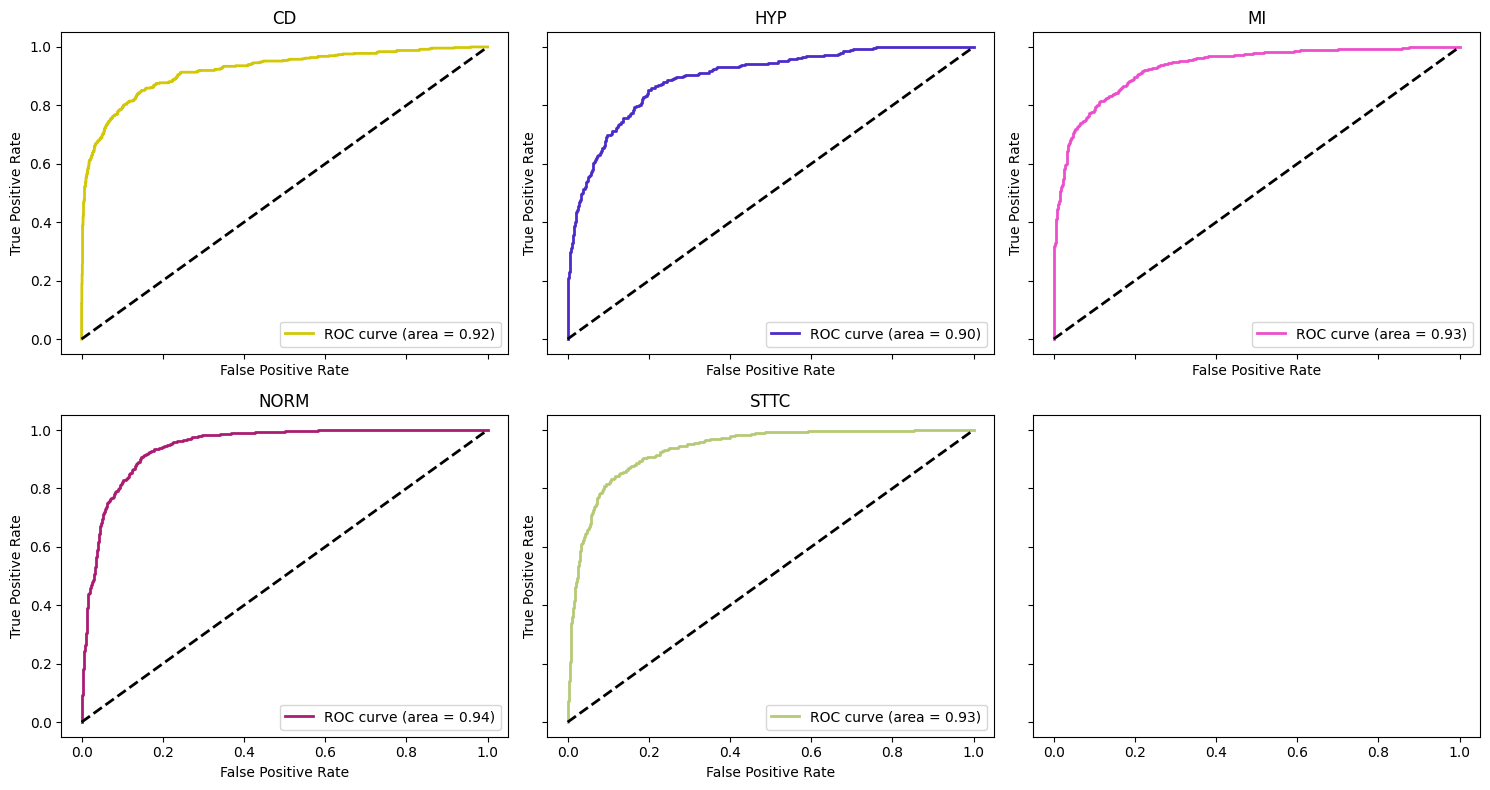

In [11]:
from numpy.core.fromnumeric import size
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np
import random
import matplotlib.pyplot as plt

def plot_ROC_Curve(y_true, y_pred, c, rows, height):
    label_binarizer = label_binarize(y_true, classes=c)
    n_classes = label_binarizer.shape[1]
    lw = 2

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    # fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(15,height), sharex=True, sharey=True)
    fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15,height), sharex=True, sharey=True)
    for i, n, ax in zip(range(n_classes), c ,axes.flatten()):
        color = (random.random(), random.random(), random.random())
        ax.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve (area = {1:0.2f})".format(i, roc_auc[i]),
        )
        ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
        ax.plot([0, 1], [0, 1], "k--", lw=lw)
        ax.legend(loc="lower right")
        ax.title.set_text(n)
    plt.tight_layout()  
    plt.show()


# plot_ROC_Curve(y_test_true_exp0, y_test_pred_exp0, MultiLabelBinarizer_exp0, 18, 60) 
# plot_ROC_Curve(y_test_true_exp1, y_test_pred_exp1, MultiLabelBinarizer_exp1, 11, 35) 
# plot_ROC_Curve(y_test_true_exp1_1, y_test_pred_exp1_1, MultiLabelBinarizer_exp1_1, 6, 17) 
plot_ROC_Curve(y_test_true_exp1_1_1, y_test_pred_exp1_1_1, MultiLabelBinarizer_exp1_1_1, 2, 8) 
# plot_ROC_Curve(y_test_true_exp2, y_test_pred_exp2, MultiLabelBinarizer_exp2, 5, 16) 
# plot_ROC_Curve(y_test_true_exp3, y_test_pred_exp3, MultiLabelBinarizer_exp3, 3, 10) 

Convert predictions to multilabel-indicator manually on a threshold 📉

In [12]:
threshold = 0.5

def apply_threshold (threshold, indicator):
  for iy, ix in np.ndindex(indicator.shape):
   if indicator[iy, ix] > threshold:
      indicator[iy, ix] = 1
   else:
      indicator[iy, ix] = 0
  return indicator  

indicator_exp1_1_1 = np.copy(y_test_pred_exp1_1_1)
indicator_exp1_1_1 = apply_threshold(threshold, indicator_exp1_1_1)

Compute confusion matrix for all experiments 🧮

In [14]:
indicator_exp1_1_1

array([[1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [47]:

superdiagnostic_CM = multilabel_confusion_matrix(y_test_true_exp1_1_1, indicator_exp1_1_1)

In [48]:
def find_mean_metrics(TP, TN, FP, FN, exp_name):
  accuracy = (TP + TN) / (FP + TP + TN + FN)
  precision = TP / (TP + FP) 
  recall = TP / (TP + FN) 
  f1_score = (2 * precision * recall) / (precision + recall)
  specificity = TN / (TN + FP) 
  print("\n--- " + exp_name + " ---")
  #Find the mean ignoring the NaN value (nanmean)
  print("Accuracy: " + f'{np.nanmean(accuracy):.4f}')
  print("Precision: " + f'{np.nanmean(precision):.4f}') #Positive Predictive Value (PPV)
  print("Recall: " + f'{np.nanmean(recall):.4f}') #True Positive Rate
#   print("F1_Score: " + f'{np.nanmean(f1_score):.4f}') #Harmonic Mean of the Precision and Recall
  print("Specificity: " + f'{np.nanmean(specificity):.4f}' + "\n") #True Negative Rate


#Super-Diagnostic
TN_superdiagnostic = superdiagnostic_CM[:, 0, 0]
TP_superdiagnostic = superdiagnostic_CM[:, 1, 1]
FN_superdiagnostic = superdiagnostic_CM[:, 1, 0]
FP_superdiagnostic = superdiagnostic_CM[:, 0, 1]
find_mean_metrics(TP_superdiagnostic, TN_superdiagnostic, FP_superdiagnostic, FN_superdiagnostic, "Super-Diagnostic")



--- Super-Diagnostic ---
Accuracy: 0.8809
Precision: 0.7358
Recall: 0.7549
Specificity: 0.8936



Plot confusion matrices 🎨

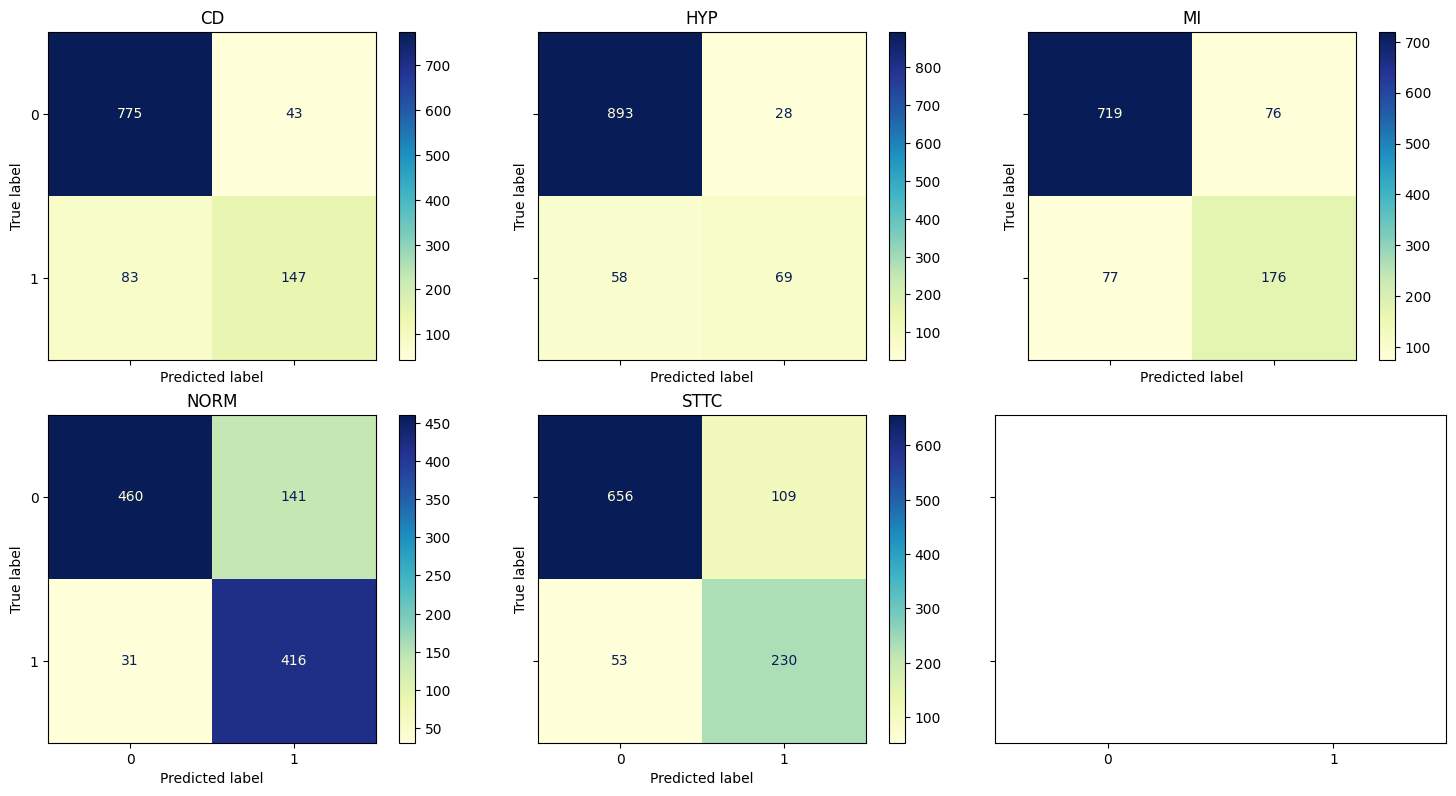

In [281]:
# try:
#     os.mkdir("/content/CMs")
# except OSError as error:
#     print(error)

def display_multi_confusion_matrix (CM, labels, rows, height, image_name):
  fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15,height), sharex=True, sharey=True)
  for cm, label, ax in zip(CM, labels, axes.flatten()):
    fig = ConfusionMatrixDisplay(cm)
    fig = fig.plot(cmap='YlGnBu', ax=ax)
    ax.title.set_text(label)
  plt.tight_layout()  
  # plt.savefig("/content/CMs/"+str(image_name)+".png")
  plt.show()


display_multi_confusion_matrix(superdiagnostic_CM, MultiLabelBinarizer_exp1_1_1, 2, 8, "superdiagnostic_CM")

Find the accuracy for all experiments 🔎

Source: https://medium.com/@yrodriguezmd/tackling-the-accuracy-multi-metric-9e2356f62513

In [282]:
def accuracy_multi(inp, targ, thresh = 0.5, sigmoid = True):
    if sigmoid: inp = inp.sigmoid()
    return((inp > thresh) == targ.bool()).float().mean()

In [283]:
# print("All accuracy: " + str(accuracy_multi(p_exp0, t_exp0, thresh=0.85)))
# print("Diagnostic accuracy: " + str(accuracy_multi(p_exp1, t_exp1, thresh=0.85)))
# print("Sub-Diagnostic accuracy: " + str(accuracy_multi(p_exp1_1, t_exp1_1, thresh=0.85)))
print("Super-Diagnostic accuracy: " + str(accuracy_multi(p_exp1_1_1, t_exp1_1_1, thresh=0.85)))
# print("Form accuracy: " + str(accuracy_multi(p_exp2, t_exp2, thresh=0.85)))
# print("Rhythm accuracy: " + str(accuracy_multi(p_exp3, t_exp3, thresh=0.85)))

Super-Diagnostic accuracy: tensor(0.7443)


Classification report for all experiments 📋

In [284]:
from sklearn.metrics import classification_report
import numpy as np

# print("All: " + str(classification_report(y_test_true_exp0, indicator_exp0, target_names= MultiLabelBinarizer_exp0)))
# print("\nDiagnostic: " + str(classification_report(y_test_true_exp1, indicator_exp1, target_names= MultiLabelBinarizer_exp1)))
# print("\nSub-Diagnostic: " + str(classification_report(y_test_true_exp1_1, indicator_exp1_1, target_names= MultiLabelBinarizer_exp1_1)))
print("\nSuper-Diagnostic: " + str(classification_report(y_test_true_exp1_1_1, indicator_exp1_1_1, target_names= MultiLabelBinarizer_exp1_1_1)))
# print("\nForm : " + str(classification_report(y_test_true_exp2, indicator_exp2, target_names= MultiLabelBinarizer_exp2)))
# print("\nRhythm : " + str(classification_report(y_test_true_exp3, indicator_exp3, target_names= MultiLabelBinarizer_exp3)))


# Get unique labels
unique_labels = MultiLabelBinarizer_exp1_1_1

# Calculate specificity for each class
specificity_per_class = []
for i, label in enumerate(unique_labels):
    true_negatives = np.sum((y_test_true_exp1_1_1[:, i] == 0) & (indicator_exp1_1_1[:, i] == 0))
    false_positives = np.sum((y_test_true_exp1_1_1[:, i] == 0) & (indicator_exp1_1_1[:, i] == 1))
    specificity = true_negatives / (true_negatives + false_positives + 1e-10)  # Adding a small epsilon to avoid division by zero
    specificity_per_class.append(specificity)

print(f"Specificity for class")
# Print specificity for each class
for i, class_name in enumerate(unique_labels):
    print(f"{class_name}: {specificity_per_class[i]}")


Super-Diagnostic:               precision    recall  f1-score   support

          CD       0.77      0.64      0.70       230
         HYP       0.71      0.54      0.62       127
          MI       0.70      0.70      0.70       253
        NORM       0.75      0.93      0.83       447
        STTC       0.68      0.81      0.74       283

   micro avg       0.72      0.77      0.75      1340
   macro avg       0.72      0.72      0.72      1340
weighted avg       0.72      0.77      0.74      1340
 samples avg       0.75      0.79      0.75      1340

Specificity for class
CD: 0.9474327628360699
HYP: 0.9695982627577665
MI: 0.9044025157231567
NORM: 0.7653910149749142
STTC: 0.8575163398691689


/global/D1/homes/jayao/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Compute classification report for all experiments manually ⚗️

In [11]:
def find_mean_metrics(TP, TN, FP, FN, exp_name):
  accuracy = (TP + TN) / (FP + TP + TN + FN)
  precision = TP / (TP + FP) 
  recall = TP / (TP + FN) 
  f1_score = (2 * precision * recall) / (precision + recall)
  specificity = TN / (TN + FP) 
  print("\n--- " + exp_name + " ---")
  #Find the mean ignoring the NaN value (nanmean)
  print("Accuracy: " + f'{np.nanmean(accuracy):.4f}')
  print("Precision: " + f'{np.nanmean(precision):.4f}') #Positive Predictive Value (PPV)
  print("Recall: " + f'{np.nanmean(recall):.4f}') #True Positive Rate
  print("F1_Score: " + f'{np.nanmean(f1_score):.4f}') #Harmonic Mean of the Precision and Recall
  print("Specificity: " + f'{np.nanmean(specificity):.4f}' + "\n") #True Negative Rate


#Super-Diagnostic
TN_superdiagnostic = superdiagnostic_CM[:, 0, 0]
TP_superdiagnostic = superdiagnostic_CM[:, 1, 1]
FN_superdiagnostic = superdiagnostic_CM[:, 1, 0]
FP_superdiagnostic = superdiagnostic_CM[:, 0, 1]
find_mean_metrics(TP_superdiagnostic, TN_superdiagnostic, FP_superdiagnostic, FN_superdiagnostic, "Super-Diagnostic")



--- Super-Diagnostic ---
Accuracy: 0.8790
Precision: 0.7693
Recall: 0.6792
F1_Score: 0.7091
Specificity: 0.9200

